# BME3053C - Computer Applications for BME

<h1 align="center">Introduction to Fourier Transforms</h1>

---

<center><h2>Lesson 09</h2></center>


# Introduction

Fourier transforms are a powerful mathematical tool used to analyze and process signals. They are widely used in various fields of biomedical engineering, including signal processing, medical imaging, and data analysis. In this lesson, we'll introduce the concept of Fourier transforms and demonstrate their application using Python.


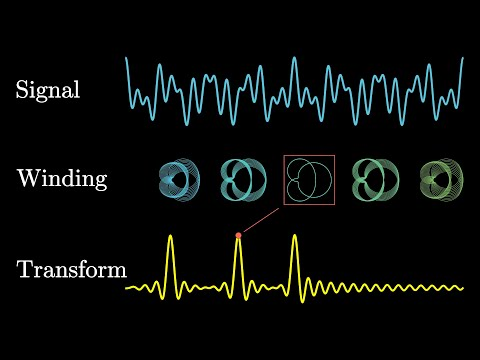

In [5]:
from IPython.display import YouTubeVideo


video = YouTubeVideo("spUNpyF58BY")

display(video)

## Importing Required Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

%matplotlib inline

# Prompt for Streamlit App

You are an AI coding assistant. Generate a complete, runnable Streamlit app that lets students interactively explore Fourier transforms. Implement ALL of the following four feature sets, **and add detailed explanatory text boxes on every tab and next to every UI element** so users understand the purpose of each control.

FEATURE SET 1 — Build-a-Signal Sandbox

1. Provide a sidebar “Signal Builder” where users can compose a signal as a sum of components.
2. Allow adding/removing at least 5 sinusoid components. For each component include:
   - amplitude slider
   - frequency slider (Hz)
   - phase slider (radians or degrees)
   - waveform type toggle: sine or cosine
   - on/off checkbox  
     Next to each control, provide a clearly written text explanation (e.g., “Amplitude controls the height of the wave. Increasing amplitude increases the energy in the spectrum at this frequency.”)
3. Include quick-add presets via dropdown:
   - square wave, triangle wave, sawtooth wave, Gaussian pulse, step, impulse/spike, chirp  
     Add a description box explaining what each preset represents and why its spectrum has a particular shape.
4. Display the current analytic signal expression in LaTeX, with a nearby explanatory box describing what each symbol means and how the sum is formed.
5. Plot the resulting time-domain signal and include a text box describing expected shapes.

FEATURE SET 2 — Time–Frequency Linked Views

1. Show side-by-side Plotly plots: time-domain (left) and frequency-domain magnitude/phase (right).
2. Enable linked interaction:
   - Hover on a frequency peak → highlight the corresponding sinusoid in the time plot  
     Include a text box: “Hovering on a frequency component helps visualize which part of the time signal this component contributes to.”
   - Hover on a time-domain event → highlight broad frequency spread  
     Include explanatory text: “Sharp events contain many frequencies. Hover to see their spectral footprint.”
3. Add a “Band Select & Reconstruct” tool:
   - Users brush a frequency range on the spectrum.
   - Inverse-transform only that band and overlay resulting signal.  
     Add a text panel explaining filtering concepts, why selecting a band isolates certain structures, and what reconstruction means.

FEATURE SET 3 — Sampling, Aliasing, Resolution Playground

1. Add controls for:
   - sampling rate fs (Hz)
   - total duration T (seconds)
   - number of samples N  
     All controls must have explanatory text next to them describing how each parameter relates to sampling theory.
2. Show sampled points overlaid on the continuous signal with a text panel explaining Nyquist, discrete representation, and how sampling changes the FFT.
3. Demonstrate aliasing:
   - When a frequency exceeds fs/2, show the aliased frequency and visualize it.  
     Include a prominent explanation of aliasing mechanics and how to interpret the aliased peak.
4. Provide controls for:
   - window length / N
   - zero padding (toggle + pad factor slider)  
     Add text explaining resolution tradeoffs, visual smoothing, and the misconception that zero padding adds new information.
5. Update plots live as sliders move.

FEATURE SET 4 — Windowing + Spectral Leakage Lab

1. Add a “Windowing” section with:
   - window type dropdown: Rectangular, Hann, Hamming, Blackman, Kaiser
   - β slider for Kaiser  
     Add text describing each window’s characteristics, use cases, and tradeoffs.
2. Show the chosen window shape in time, with a panel explaining why windowing reduces edge discontinuities.
3. Multiply the time signal by the window before FFT.
4. Demonstrate spectral leakage:
   - Provide a toggle “Misalign frequency to bin”  
     Add text describing why non-bin-centered frequencies cause spreading in the spectrum.
5. Display readouts for:
   - main-lobe width estimate
   - peak sidelobe level estimate  
     Include explanations of why these matter in real applications.

GENERAL UI EXPLANATION REQUIREMENTS

- Every tab must open with a detailed explanatory text box describing:
  - The purpose of this tab
  - Key concepts the student should learn
  - What each UI control on this tab does and why
- Every slider, toggle, dropdown, and plot should be accompanied by a short text note explaining its function.
- The UI should feel like an educational lab, with rich, clear, concept-focused explanations.

GENERAL IMPLEMENTATION REQUIREMENTS

- Use Python, Streamlit, NumPy, SciPy (if needed), and Plotly.
- Organize code with helper functions:
  - generate_time_vector()
  - build_signal(components, presets, t)
  - fft_spectrum(x, fs, window, zero_pad_factor)
  - reconstruct_band(X, freqs, band)
  - compute_window(name, N, beta)
- Use a tabbed UI with at least:
  1. Signal Builder
  2. Sampling & Aliasing
  3. Windowing & Leakage
  4. Band Reconstruction  
     Tabs can share state via st.session_state.
- Include short but clear educational text boxes everywhere they are helpful.
- Ensure app runs with: streamlit run streamlit_app.py

PROJECT STRUCTURE TO OUTPUT

- streamlit_app.py (main app)
- requirements.txt
- README.md with setup + usage + explanation of all tabs/features

OUTPUT
Return the full code for all files in clearly labeled code fences:

```python
# streamlit_app.py
...
```


# Fourier Transform Introduction

## 1. Basic Concept

The Fourier transform converts a signal from the time domain (where it's typically measured) to the frequency domain. This allows us to see what frequencies are present in the signal and their relative strengths.

## 2. Continuous Fourier Transform

For continuous signals, the Fourier transform is defined as:

$F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i\omega t} dt$

Where:

- $F(\omega)$ is the Fourier transform (a function of frequency $\omega$)
- $f(t)$ is the original signal (a function of time $t$)
- $e^{-i\omega t}$ is the complex exponential that allows us to analyze different frequencies

## 3. Discrete Fourier Transform (DFT)

For discrete signals (like those in digital systems), we use the DFT:

$X_k = \sum_{n=0}^{N-1} x_n e^{-i2\pi kn/N}$

Where:

- $X_k$ is the $k$-th frequency component
- $x_n$ is the $n$-th time sample
- $N$ is the total number of samples

## 4. Interpretation

- The Fourier transform essentially "projects" the signal onto sine and cosine waves of different frequencies.
- The magnitude of the Fourier transform at a particular frequency tells us how much of that frequency is present in the original signal.
- The phase of the Fourier transform tells us about the timing or offset of these frequency components.

## 5. Applications

- Signal analysis: Identifying dominant frequencies in a signal
- Filtering: Removing unwanted frequencies (like noise)
- Compression: Representing signals more efficiently in the frequency domain
- Image processing: Analyzing and manipulating images in the frequency domain
- Communications: Modulating and demodulating signals

## 6. Inverse Fourier Transform

We can also convert back from the frequency domain to the time domain using the inverse Fourier transform, allowing us to reconstruct the original signal after performing operations in the frequency domain.

The Fourier transform is particularly useful in biomedical engineering for tasks like analyzing ECG signals, processing medical images, and filtering noise from biological signals.


# Biological Analogy: The Human Ear as a Frequency Analyzer

Our ears break down incoming sound waves into different frequency components along the **basilar membrane**. Certain parts of the membrane vibrate more at certain frequencies—similar to how a Fourier Series would represent a periodic signal with distinct frequency components.

- **Tonotopic organization**: Different locations in the cochlea respond to different frequencies.
- **Frequency range**: Humans typically hear from about 20 Hz up to about 20 kHz.
- This is a real-world confirmation that analyzing signals by frequency (amplitude + phase) is not just a math trick—it’s how nature (and our auditory system) works!


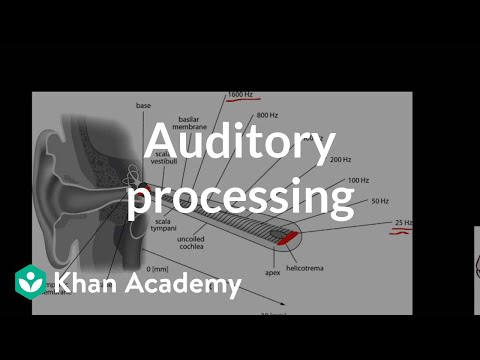

In [2]:
from IPython.display import YouTubeVideo


video = YouTubeVideo("peSLM4XObBE")

display(video)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle  # Ensure this import is included
import numpy as np
from IPython.display import display, Markdown

markdown_text = """
### Human Auditory Signal Processing

- Our auditory system performs a **frequency analysis** of the incoming sound waves.
- The **tonotopic organization** of the basilar membrane decomposes the sound signal into its constituent frequency components.
- This process is very reminiscent of what the **Fourier Series** does, right?
  - However, the Fourier Series typically represents periodic functions.
- But are all the sounds we hear periodic like the ones the Fourier Series is representing?
  - Not really....

**Conclusion**: While our auditory pathway conceptually mirrors mathematical tools like the Fourier Series, real-world sounds often exhibit non-periodic characteristics, which are still effectively analyzed by our auditory system.
"""
display(Markdown(markdown_text))

def plot_frequency_response():
    # Frequencies in Hz (log scale for better visualization)
    frequencies = np.logspace(np.log10(20), np.log10(20000), 400)

    # Simulate some normalized pressure levels
    pressures = np.interp(frequencies, [20, 20000], [5, 150])  # Simulated pressure level curve

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.semilogx(frequencies, pressures, label='General Audible Range (5dB - 150dB)')
    ax.add_patch(Rectangle((100, 30), 3900, 45, color='green', alpha=0.3, label='Speech Range (100Hz - 4kHz, 30dB - 75dB)'))
    ax.add_patch(Rectangle((50, 30), 16950, 70, color='blue', alpha=0.3, label='Music Range (50Hz - 17kHz, 30dB - 100dB)'))

    # Labels & Title
    ax.set_title('Frequency Response of Human Hearing')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Sound Pressure Level (dB)')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend()

    plt.show()

plot_frequency_response()

In [1]:
import numpy as np
from IPython.display import display, Audio, Markdown
import ipywidgets as widgets

def play_sound(frequency):
    sample_rate = 44100
    duration = 1.0
    t = np.linspace(0, duration, int(sample_rate * duration), False)
    audio = np.sin(2 * np.pi * frequency * t)
    return Audio(audio, rate=sample_rate, autoplay=True)

frequency_slider = widgets.IntSlider(min=20, max=20000, value=2000, description='Frequency (Hz)')
play_button = widgets.Button(description="Play Sound")

def on_button_clicked(_):
    display(play_sound(frequency_slider.value))

play_button.on_click(on_button_clicked)

display(Markdown("### Let's see how much you can hear!"))
display(Markdown("Move the slider to select a frequency (from 20 Hz to 20 kHz) and then click 'Play Sound' to listen."))
display(widgets.VBox([frequency_slider, play_button]))


### Let's see how much you can hear!

Move the slider to select a frequency (from 20 Hz to 20 kHz) and then click 'Play Sound' to listen.

# Brain Wave Frequency Ranges

Brain activity can be measured using electroencephalography (EEG), which detects electrical signals produced by the brain. These signals can be analyzed in terms of their frequency components, revealing different types of brain waves:

1. **Delta waves (0.5-4 Hz)**:

   - Associated with deep sleep and unconsciousness
   - Dominant during healing and regeneration

2. **Theta waves (4-8 Hz)**:

   - Present during drowsiness, meditation, and light sleep
   - Associated with creativity and deep relaxation

3. **Alpha waves (8-13 Hz)**:

   - Dominant during relaxed wakefulness with closed eyes
   - Indicate a calm, alert state of consciousness

4. **Beta waves (13-30 Hz)**:

   - Present during normal waking consciousness and active thinking
   - Associated with focus, problem-solving, and active concentration

5. **Gamma waves (30-100+ Hz)**:
   - Linked to higher cognitive functions and information processing
   - Associated with peak concentration and cognitive performance

These frequency ranges demonstrate how the brain, like our auditory system, processes information in terms of frequency components.


## Applications in Biomedical Engineering

Fourier transforms have numerous applications in biomedical engineering, including:

1. ECG signal analysis
2. MRI image reconstruction
3. Filtering noise from biomedical signals
4. Spectral analysis of EEG signals

Let's look at a simple example of filtering noise from a signal.


## Fourier Transform Basics

The Fourier transform decomposes a signal into its constituent frequencies. It converts a signal from the time domain to the frequency domain.

The Fourier transform $F(\omega)$ of a continuous-time signal $f(t)$ is given by:

$F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i\omega t} dt$

For discrete signals, we use the Discrete Fourier Transform (DFT):

$X_k = \sum_{n=0}^{N-1} x_n e^{-i2\pi kn/N}$

where $X_k$ is the $k$-th frequency component, and $x_n$ is the $n$-th time sample.


# Understanding $e^{-i\omega t}$ in Fourier Transforms

**$e^{-i\omega t}$:** Represents a rotating vector in the complex plane, used to analyze how much of each frequency component is present in the signal.

In the expression $e^{-i\omega t}$:

- $\omega$ (omega) represents the angular frequency of the sinusoidal component being analyzed. It's measured in radians per second.
- $t$ represents time.

By varying $\omega$, we can analyze different frequency components in the signal, while $t$ allows us to see how these components evolve over time. This is the core mechanism that allows the Fourier transform to decompose a signal into its constituent frequencies.


## Example: Analyzing a Simple Signal

Let's create a simple signal composed of two sine waves and analyze it using the Fourier transform.


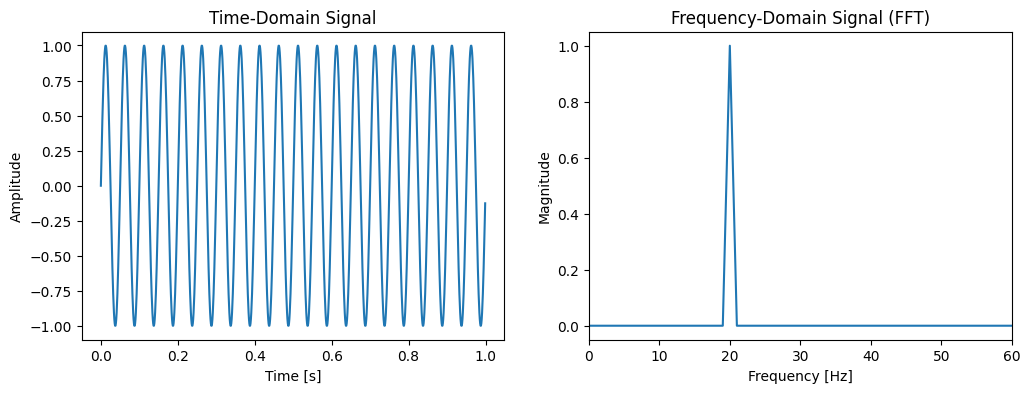

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Define a simple sine wave signal
sampling_rate = 1000  # Samples per second
T = 1.0 / sampling_rate  # Sampling interval
x = np.linspace(0.0, 1.0, sampling_rate, endpoint=False)
freq = 20  # Frequency of the signal in Hz
signal = np.sin(2 * np.pi * freq * x)

# Compute the FFT
fft_result = fft(signal)
fft_freq = fftfreq(sampling_rate, T)

# Plot the signal and its FFT
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(x, signal)
ax1.set_title('Time-Domain Signal')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude')

# Modify the FFT plot to span from 0 to 60 Hz
ax2.plot(fft_freq[:sampling_rate // 2], 2.0 / sampling_rate * np.abs(fft_result[:sampling_rate // 2]))
ax2.set_title('Frequency-Domain Signal (FFT)')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Magnitude')
ax2.set_xlim(0, 60)  # Set x-axis limit from 0 to 60 Hz

plt.show()

# The FFT graph shows a peak at 45 Hz, indicating that the signal's main frequency component is 45 Hz.

# Signals with Multiple Frequencies

- Peak Detection: The FFT result shows peaks at frequencies present in the signal. Multiple peaks indicate multiple frequency components.
- Magnitude Analysis: The height of each peak in the FFT plot corresponds to the strength or amplitude of that frequency component in the original signal.
- Frequency Resolution: The FFT provides a frequency spectrum, allowing us to identify and distinguish between different frequency components, even when they are close together.
- Harmonic Analysis: FFT can reveal harmonics (integer multiples of a fundamental frequency) that may be present in complex signals.
  These capabilities make FFT a powerful tool for analyzing signals composed of multiple frequency components, which is common in many biomedical applications.


In [2]:
from ipywidgets import interactive, widgets

# Generate a signal
t = np.linspace(0, 1, 1000, endpoint=False)

amp1=1
amp2=0.5

def plot_signals(freq1, freq2, offset1, offset2):
    # Generate individual components
    signal1 = amp1 * np.cos(2 * np.pi * freq1 * t + offset1 * freq1)
    signal2 = amp2 * np.sin(2 * np.pi * freq2 * t + offset2 * freq2)
    combined_signal = signal1 + signal2
    
    # Compute the Fourier transform
    fft_result = fft(combined_signal)
    frequencies = np.fft.fftfreq(len(t), t[1] - t[0])
    
    # Plot the original signal and its frequency spectrum
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, signal1, label=f'Component 1 ({freq1} Hz)', alpha=0.2)
    plt.plot(t, signal2, label=f'Component 2 ({freq2} Hz)', alpha=0.2)
    plt.plot(t, combined_signal, label='Combined Signal', linewidth=3)
    plt.title('Time Domain Signals')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_result)[:len(frequencies)//2])
    plt.title('Frequency Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, 60)  # Set x-axis limit to 60 Hz
    plt.tight_layout()
    plt.show()

# Create interactive plot with sliders
interactive_plot = interactive(
    plot_signals,
    freq1=widgets.IntSlider(min=1, max=50, value=10, description='Frequency 1 (Hz)'),
    freq2=widgets.IntSlider(min=1, max=50, value=30, description='Frequency 2 (Hz)'),
    offset1=widgets.FloatSlider(min=0, max=2*np.pi, value=0, description='Offset 1 (rad)'),
    offset2=widgets.FloatSlider(min=0, max=2*np.pi, value=0, description='Offset 2 (rad)')
)

display(interactive_plot)

interactive(children=(IntSlider(value=10, description='Frequency 1 (Hz)', max=50, min=1), IntSlider(value=30, …

# Filtering Signals

- Noise Separation: FFT can help separate actual signal frequencies from background noise, which typically appears as a relatively flat spectrum.
- Frequency Domain Filtering: After applying FFT, you can identify and remove unwanted frequency components (noise) in the frequency domain.


## Low-Pass, High-Pass, and Band-Pass Filters

- **Low-Pass Filter (LPF)**:

  - Allows signals with frequencies **below a certain cutoff frequency** to pass through while attenuating higher frequencies.
  - Commonly used to remove **high-frequency noise** from signals, preserving the slower, more relevant components.
  - Example: Smoothing an ECG signal by removing high-frequency noise caused by muscle activity or electrical interference.

- **High-Pass Filter (HPF)**:

  - Allows signals with frequencies **above a certain cutoff frequency** to pass through, blocking lower frequencies.
  - Useful for eliminating **low-frequency drifts** or baseline wander in signals.
  - Example: Removing baseline drift in an ECG signal caused by movement or changes in electrode contact.

- **Band-Pass Filter (BPF)**:
  - Allows signals within a **specific frequency range** (between a lower and upper cutoff) to pass through, while attenuating frequencies outside this range.
  - Often used in biomedical applications to isolate **key physiological frequency ranges**, such as heartbeats in ECG or brainwave patterns in EEG.
  - Example: Filtering an ECG to keep only frequencies between 0.5 Hz and 40 Hz, capturing the relevant heartbeats while discarding noise.


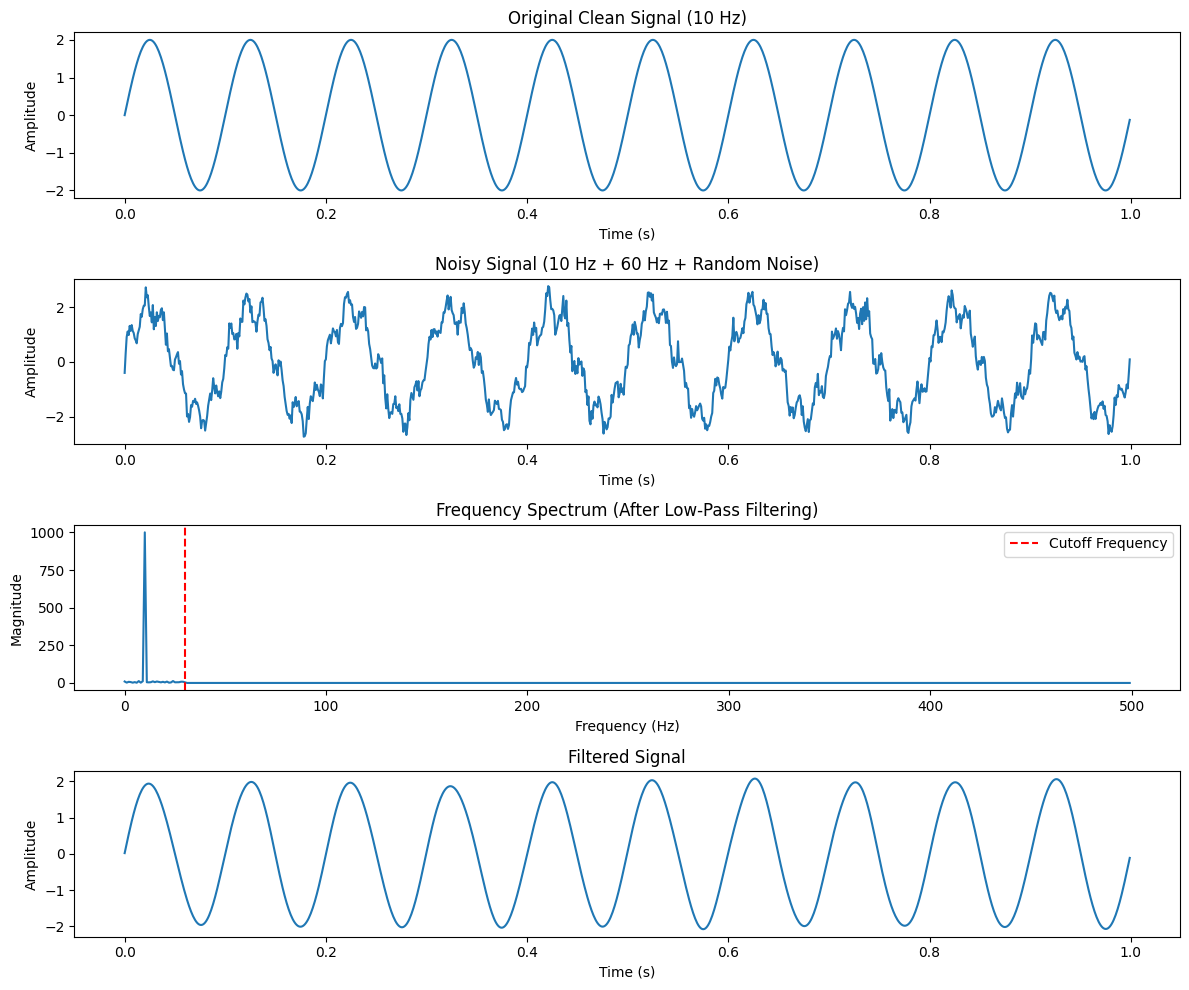

SNR before filtering: 10.93 dB
SNR after filtering: 28.70 dB
SNR improvement: 17.78 dB


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
#  Removing 60 Hz Noise with a Low-Pass Filter

# Generate a signal with 60 Hz noise (simulating power line interference)
t = np.linspace(0, 1, 1000, endpoint=False)
clean_signal = 2 * np.sin(2 * np.pi * 10 * t)  # 10 Hz sine wave
noise_60hz = 0.5 * np.sin(2 * np.pi * 60 * t)  # 60 Hz noise
noisy_signal = clean_signal + noise_60hz + 0.2 * np.random.normal(size=len(t))

# Compute the Fourier transform
fft_result = fft(noisy_signal)
frequencies = np.fft.fftfreq(len(t), t[1] - t[0])

# Apply a low-pass filter to remove 60 Hz noise
cutoff_frequency = 30  # Hz
fft_result[np.abs(frequencies) > cutoff_frequency] = 0

# Compute the inverse Fourier transform
filtered_signal = ifft(fft_result).real

# Plot the results
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(t, clean_signal)
plt.title('Original Clean Signal (10 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(t, noisy_signal)
plt.title('Noisy Signal (10 Hz + 60 Hz + Random Noise)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 3)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_result)[:len(frequencies)//2])
plt.title('Frequency Spectrum (After Low-Pass Filtering)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.axvline(x=cutoff_frequency, color='r', linestyle='--', label='Cutoff Frequency')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(t, filtered_signal)
plt.title('Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Calculate and print the Signal-to-Noise Ratio (SNR) before and after filtering
def calculate_snr(signal, noise):
    return 10 * np.log10(np.sum(signal**2) / np.sum(noise**2))

snr_before = calculate_snr(clean_signal, noisy_signal - clean_signal)
snr_after = calculate_snr(clean_signal, filtered_signal - clean_signal)

print(f"SNR before filtering: {snr_before:.2f} dB")
print(f"SNR after filtering: {snr_after:.2f} dB")
print(f"SNR improvement: {snr_after - snr_before:.2f} dB")


## Signal-to-Noise Ratio (SNR)

- **Signal-to-Noise Ratio (SNR)**:
  - The ratio of the **power of the desired signal** to the **power of background noise** in a system, often expressed in decibels (dB).
  - A higher SNR indicates a **clearer signal** with less interference from noise, while a lower SNR means the signal is more obscured by noise.
  - **SNR Formula**:
    $SNR = 10 \log_{10} \left( \frac{P_{\text{signal}}}{P_{\text{noise}}} \right)$
    where $(P_{\text{signal}})$ is the power of the signal and $(P_{\text{noise}})$ is the power of the noise.
  - **Application**: In biomedical signal analysis, like ECG, a good SNR is crucial for accurately detecting physiological events, such as heartbeats, without being masked by noise from muscle activity or electrical interference.
  - **Improving SNR**:
    - Filtering: Applying low-pass, high-pass, or band-pass filters to remove noise outside the frequency range of interest.
    - Averaging: Taking multiple measurements and averaging them can reduce random noise and improve SNR.
    - Shielding and proper electrode placement: Reducing electrical interference and ensuring high-quality data collection improves the SNR at the source.


## Discrete Signals

When we sample a signal, we need to consider the Nyquist frequency. The Nyquist frequency, named after Harry Nyquist, is a fundamental concept in signal processing and digital sampling. It is defined as half the sampling rate of a discrete signal processing system.

Key points about the Nyquist frequency:

2. **Nyquist-Shannon sampling theorem**: To accurately reconstruct a signal, the sampling rate must be at least twice the highest frequency component in the signal.

3. **Aliasing**: If a signal contains frequencies above the Nyquist frequency, these will be "aliased" and appear as lower frequencies in the sampled signal, causing distortion.

4. **Applications**: Understanding the Nyquist frequency is crucial in various fields, including:

   - Audio processing
   - Image and video processing
   - Biomedical signal analysis (e.g., ECG, EEG)
   - Communications systems

5. **Practical implications**:
   - To avoid aliasing, signals should be low-pass filtered before sampling to remove frequencies above the Nyquist frequency.
   - The choice of sampling rate in data acquisition systems is often based on the Nyquist frequency of the signal of interest.

In the following example, we'll demonstrate the effects of sampling a signal above and below the Nyquist frequency.


In [7]:
def demonstrate_nyquist_frequency(f_signal, fs_low, fs_adequate):
    duration = 1.0
    continuous_rate = 5000  # high-rate reference
    nyquist = 2 * f_signal

    t_cont = np.linspace(0, duration, int(continuous_rate * duration), endpoint=False)
    sig_cont = np.sin(2 * np.pi * f_signal * t_cont)

    t_low = np.linspace(0, duration, int(fs_low * duration), endpoint=False)
    sig_low = np.sin(2 * np.pi * f_signal * t_low)

    t_ok = np.linspace(0, duration, int(fs_adequate * duration), endpoint=False)
    sig_ok = np.sin(2 * np.pi * f_signal * t_ok)

    t_recon = t_cont
    sig_recon = np.interp(t_recon, t_low, sig_low)

    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(t_cont, sig_cont)
    plt.title(f'Original Continuous Signal ({f_signal} Hz)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 2)
    plt.plot(t_low, sig_low, 'ro', label='Samples (fs_low)')
    plt.plot(t_recon, sig_recon, 'r--', label='Reconstructed (aliased)')
    alias_note = 'ALIasing!' if fs_low < nyquist else 'No aliasing'
    plt.title(f'Undersampled (fs_low={fs_low} Hz, Nyquist={nyquist} Hz) -> {alias_note}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(t_ok, sig_ok, 'go-', label='Samples (fs_adequate)')
    adequate_note = 'Adequate' if fs_adequate >= nyquist else 'Still undersampled'
    plt.title(f'Adequate Sampling (fs_adequate={fs_adequate} Hz) -> {adequate_note}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f'Signal freq: {f_signal} Hz | Nyquist: {nyquist} Hz')
    print(f'fs_low: {fs_low} Hz -> {"aliasing" if fs_low < nyquist else "ok"}')
    print(f'fs_adequate: {fs_adequate} Hz -> {"ok" if fs_adequate >= nyquist else "undersampled"}')

interactive_plot = interactive(
    demonstrate_nyquist_frequency,
    f_signal=widgets.IntSlider(min=1, max=50, value=5, description='Signal f (Hz)'),
    fs_low=widgets.IntSlider(min=2, max=200, value=10, description='fs_low'),
    fs_adequate=widgets.IntSlider(min=2, max=200, value=20, description='fs_adequate')
)

display(interactive_plot)


interactive(children=(IntSlider(value=5, description='Signal f (Hz)', max=50, min=1), IntSlider(value=10, desc…

## Conclusion

In this lesson, we've introduced the concept of Fourier transforms and demonstrated their application in signal analysis and filtering. As you continue your studies in biomedical engineering, you'll encounter many more applications of Fourier transforms in areas such as medical imaging, biosignal processing, and data analysis.
